# Задачи по статистике в R

Различные задачи по языку R и  статистике в R:
- [Основы программирования на R](https://stepik.org/course/497)
- [Анализ данных в R на Stepik](https://stepik.org/course/129/)

Данные приводятся исключительно для ознакомления в качестве личного конспекта. Перед решениями не стоит задачи строгого соответствия вопросам упомянутых курсов.

---
# R: Факторы и строки

**Задача**. Превратите количественную переменную `mag` (сила землетрясения в баллах по шкале Рихтера) датафрейма `quakes` в качественную. Интервалы должны быть длиной в полбалла, начиная с минимального, при этом левый конец интервала включается. Далее отсортируйте общее количество случаев, попавших в каждую категорию, в порядке убывания.

In [231]:
t <- cut(quakes$mag, breaks = 0.5*(8:13), right=F)
sort(table(t), decreasing = T)

t
[4,5,5) [4,4,5) [5,5,5) [5,5,6) [6,6,5) 
    425     377     160      33       5 

# Анализ номинативных данных

---
**Задача**. Воспользуемся данными diamonds из библиотеки `ggplot2`. При помощи критерия Хи-квадрат проверьте гипотезу о взаимосвязи качества огранки бриллианта (`сut`) и его цвета (`color`). В переменную `main_stat` сохраните значение статистики критерия Хи-квадрат.

In [121]:
# install.packages("ggplot2")
library(ggplot2)
options(repr.plot.width = 5, repr.plot.height = 2.5, repr.plot.res = 100)

diamonds_table <- table(diamonds$cut, diamonds$color)    
chi_result <- chisq.test(diamonds_table )    
main_stat <- chi_result$statistic

In [122]:
chi_result


	Pearson's Chi-squared test

data:  diamonds_table
X-squared = 310,32, df = 24, p-value < 2,2e-16


In [123]:
main_stat

X-squared 
 310,3179

---
**Задача**. Вновь воспользуемся данными `diamonds` из библиотеки `ggplot2`. При помощи критерия Хи-квадрат проверьте гипотезу о взаимосвязи цены (`price`) и каратов (`carat`) бриллиантов. Для этого сначала нужно перевести эти количественные переменные в формат пригодный для Хи-квадрат. Создайте две новые переменные в данных `diamonds`:

- `factor_price` - 1, если значение цены больше либо равно, чем среднее, и 0, если значение цены ниже среднего цены по выборке.
- `factor_carat` - 1, если число карат больше либо равно, чем среднее, и 0, если ниже среднего числа карат по выборке.

Важный момент - на больших данных цикл for() работает довольно медленно, постарайтесь решить эту задачу без его использования!
Используя эти шкалы при помощи Хи-квадрат проверьте исходную гипотезу. Сохраните в переменную `main_stat` значение критерия  Хи-квадрат.

Пример перевода количественной шкалы в номинативную:

```R
> x <- (1, 2, 3, 5, 6, 7) # mean(x) = 4
> factor_x <- (0, 0, 0, 1, 1, 1)
```

In [124]:
factor_price <- ifelse(diamonds$price >= mean(diamonds$price), 1, 0)
factor_carat <- ifelse(diamonds$carat >= mean(diamonds$carat), 1, 0)
diamonds_table <- table(factor_price, factor_carat)
chi_result <- chisq.test(diamonds_table )    
main_stat <- chi_result$statistic

In [125]:
main_stat

X-squared 
 40735,22

**Задача**. При помощи точного критерия Фишера проверьте гипотезу о взаимосвязи типа коробки передач (`am`) и типа двигателя (`vs`) в данных `mtcars`. Получившийся p-уровень значимости сохраните в переменную `fisher_test`.

In [126]:
fisher_test <- fisher.test(table(mtcars$am, mtcars$vs))$p

# Сравнение двух групп

Рассмотрим t-критерий на примере датасета `iris`. Выделим два вида.

In [127]:
df <- subset(iris, Species != 'setosa')

In [128]:
table(df$Species)


    setosa versicolor  virginica 
         0         50         50 

Проверим форму распределений.

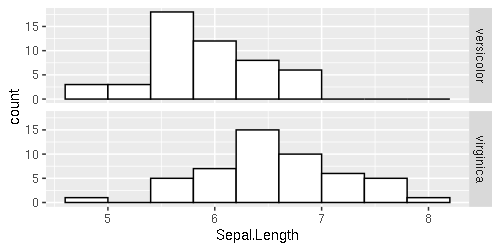

In [129]:
ggplot(df, aes(x = Sepal.Length)) +
geom_histogram(fill="white",
               col="black", 
               binwidth=0.4) +
facet_grid(Species ~ .)

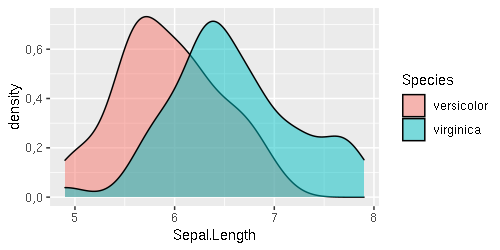

In [130]:
ggplot(df, aes(Sepal.Length, fill = Species )) +
geom_density(alpha = 0.5)

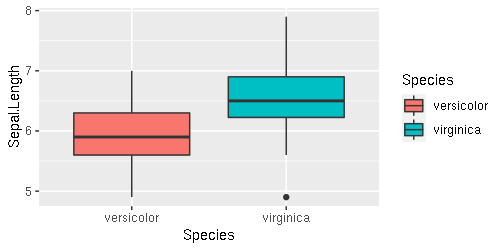

In [131]:
ggplot(df, aes(Species, Sepal.Length, fill = Species )) +
geom_boxplot()

Видим приблизительно симметричные, близкие к нормальным распределения, гомогенные. Проверим эти предположения с помощью тестов.

Сначала проверим нормальность с помощью [критерия Шапиро-Уилка](https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B8_%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D1%81%D1%82%D0%B8).

In [132]:
shapiro.test(df$Sepal.Length)


	Shapiro-Wilk normality test

data:  df$Sepal.Length
W = 0,98054, p-value = 0,1464


In [133]:
shapiro.test(df$Sepal.Length[df$Species == "versicolor"])


	Shapiro-Wilk normality test

data:  df$Sepal.Length[df$Species == "versicolor"]
W = 0,97784, p-value = 0,4647


In [134]:
shapiro.test(df$Sepal.Length[df$Species == "virginica"])


	Shapiro-Wilk normality test

data:  df$Sepal.Length[df$Species == "virginica"]
W = 0,97118, p-value = 0,2583


Проверим гомогенность дисперсии по [критерию Бартлетта](https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%91%D0%B0%D1%80%D1%82%D0%BB%D0%B5%D1%82%D1%82%D0%B0).

In [135]:
bartlett.test(Sepal.Length ~ Species, df)


	Bartlett test of homogeneity of variances

data:  Sepal.Length by Species
Bartlett's K-squared = 2,0949, df = 1, p-value = 0,1478


Данные проверили, теперь выполним сам t-тест.

In [137]:
t_test <- t.test(Sepal.Length ~ Species, df)

In [141]:
t_test$p.value

[1] 1,866144e-07

Тест пройден.

Рассмотрим ситуацию для парной выборки:

In [144]:
t.test(df$Petal.Length,
       df$Petal.Width,
       paired = T)


	Paired t-test

data:  df$Petal.Length and df$Petal.Width
t = 60,552, df = 99, p-value < 2,2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3,124156 3,335844
sample estimates:
mean of the differences 
                   3,23 


# Памятка
t-Критерий Стьюдента для независимых выборок

```
t.test(Var1 ~ Var2, data) # если первая переменная количественная, а вторая фактор
t.test(data$Var1, data$Var2) # если обе переменные количественные
```

t-Критерий Стьюдента для зависимых выборок

```
t.test(data$Var1, data$Var2, paired = T)
```

Проверка на нормальность распределения

```
shapiro.test(Var1) # проверка на нормальность распределения переменной Var1
# но не удобно когда есть группирующая факторная переменная
```

Поможет функция by(), которая применяет различные функции на каждом уровне фактора.  

```
by(iris$Sepal.Length, INDICES = iris$Species, shapiro.test) # проверка на нормальность переменной 
# Sepal.Length в трех разных группах в соответствии с переменной Species
```

Проверка на гомогенность дисперсий

```
bartlett.test(mpg ~ am, mtcars) #Критерий Бартлетта
```

---
**Задача про свинок**. Воспользуемся встроенным набором данных в R - `ToothGrowth`. Данные позволяют исследовать рост зубов у морских свинок в зависимости от дозировки витамина C и типа потребляемых продуктов.

Сравните среднее значение длины зубов свинок, которые потребляли апельсиновый сок (OJ) с дозировкой 0.5 миллиграмм, со средним значением длины зубов свинок, которые потребляли аскорбиновую кислоту (VC) с дозировкой 2 миллиграмма. 

Значение t-критерия сохраните в переменную `t_stat`.

In [206]:
data <- subset(ToothGrowth, supp=='OJ' & dose==0.5 | supp=='VC' & dose==2)    
t_stat <- t.test(len ~ supp, data)$statistic

In [207]:
t_stat

t 
-6,232482

In [221]:
?cut

cut {base},R Documentation
x,a numeric vector which is to be converted to a factor by cutting.
breaks,either a numeric vector of two or more unique cut points or a single number (greater than or equal to 2) giving the number of intervals into which x is to be cut.
labels,"labels for the levels of the resulting category. By default, labels are constructed using ""(a,b]"" interval notation. If labels = FALSE, simple integer codes are returned instead of a factor."
include.lowest,"logical, indicating if an ‘x[i]’ equal to the lowest (or highest, for right = FALSE) ‘breaks’ value should be included."
right,"logical, indicating if the intervals should be closed on the right (and open on the left) or vice versa."
dig.lab,integer which is used when labels are not given. It determines the number of digits used in formatting the break numbers.
ordered_result,logical: should the result be an ordered factor?
...,further arguments passed to or from other methods.


t
[4,5,5) [4,4,5) [5,5,5) [5,5,6) [6,6,5) 
    425     377     160      33       5 